# Transfer Learning with Scaling-Up

> We have seen the power of transfer learning with `Feature Extraction and Fine-Tuning` of models.

> Now we would be using those models to train on the `Food101 dataset` with all the `101` food classes together.

**Food101 Dataset** -> https://www.kaggle.com/datasets/dansbecker/food-101

**Page With Code** -> https://paperswithcode.com/dataset/food-101

**Original Page** -> https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf

> In the paper they used `Random Forest` and got an accuracy score of `50.76%`. 


> In this notebook, we will get a better score than the paper on only `10%` of the training data with all of the `101` classes in the dataset.  



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.efficientnet import EfficientNetB0



## Importing helper functions

In [2]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py

--2022-08-02 06:29:46--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14050 (14K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.72K  --.-KB/s    in 0s      

2022-08-02 06:29:46 (73.7 MB/s) - ‘helper_functions.py’ saved [14050/14050]



In [3]:
from helper_functions import compare_historys, unzip_data, create_tensorboard_callback, plot_loss_curves, walk_through_dir, model_check_point_callback, create_data_augmented_layer_for_model, create_feature_extraction_model

## Getting the data

> Using only `10%` of the data with all of the `101` food classes in the dataset.

> We are getting the datasets from the original Food101 dataset but it has been preprocessed using the `image_data_modification` notebook -> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2022-08-02 06:29:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   231MB/s    in 6.7s    

2022-08-02 06:29:53 (231 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [5]:
unzip_data('101_food_classes_10_percent.zip')

In [6]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/red_velvet_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/tacos'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_quesadilla'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/gnocchi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_toast'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/peking_duck'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caesar_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/creme_brulee'.
There are 0 directories and 75 images 

In [7]:
train_dir='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'

In [8]:
len(train_dir)

33

In [9]:
IMG_SIZE= (224,224)
BATCH_SIZE=32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical", image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical", image_size=IMG_SIZE,shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Creating a model with transfer learning with 10% of the 101 food classes dataset

* Create ModelCheckpoint callback
* Create Data Augmentation layer for the model
* Build a *feature extraction model* with `EfficientNet_B0` architecture and a custom output layer

### ModelCheckpoint callback

In [10]:
file_path= '101_classes_10_percent_model_checkpoint'
model_check_point_callback=model_check_point_callback(file_path, save_weights_only=True, save_best_only=True, monitor="val_accuracy")
model_check_point_callback

### Data Augmentation Layer

In [11]:
augmented_layer=create_data_augmented_layer_for_model(RandomFlip="horizontal", RandomRotation=0.2, RandomZoom=0.2, RandomHeight=0.2, RandomWidth=0.2)
augmented_layer

### Tensorflow Callback

In [12]:
tensorboard_dir_name="(transfer_learning)", 
tensorboard_experiment_name="(10_percent_data_augmented_feature_extraction)"

In [13]:
len(train_data_10_percent.class_names)

101

### Creating the feature-extraction model

In [14]:
INPUT_SHAPE=(224,224,3)
CLASS_COUNT= len(train_data_10_percent.class_names)
EPOCHS=10

# create_feature_extraction_model(data_augmented_layer=augmented_layer, model_checkpoint_callback=model_check_point_callback, input_shape=INPUT_SHAPE, base_model_name=EfficientNetB0, include_top=False, class_count=CLASS_COUNT,train_data=train_data_10_percent, test_data=test_data, epochs=EPOCHS, tensorboard_dir_name=tensorboard_dir_name,tensorboard_experiment_name= tensorboard_experiment_name)

In [15]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_0= keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

history_0_10_percent= model_0.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction"), model_check_point_callback])



16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220802-063016
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 3.4760 - accuracy: 0.2477
Epoch 1: val_accuracy improved from -inf to 0.45715, saving model to 101_classes_10_percent_model_checkpoint
237/237 [==============================] - 142s 520ms/step - loss: 3.4760 - accuracy: 0.2477 - val_loss: 2.4414 - val_accuracy: 0.4571
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 2.3620 - accuracy: 0.4570
Epoch 2: val_accuracy improved from 0.45715 to 0.51671, saving model to 101_classes_10_percent_model_checkpoint
237/237 [==============================] - 104s 438ms/step - loss: 2.3620 - accuracy: 0.4570 - val_loss: 2.0117 - val_accuracy: 0.5167
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 1.9766 - accuracy: 0.5288
Epoch 3: val_accuracy improved from 0.51671 

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2D (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [17]:
model_0.evaluate(test_data)

790/790 [==============================] - 59s 74ms/step - loss: 1.6350 - accuracy: 0.5655


[1.6349503993988037, 0.5655049681663513]

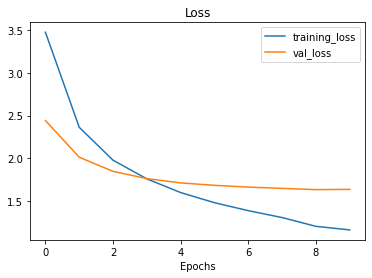

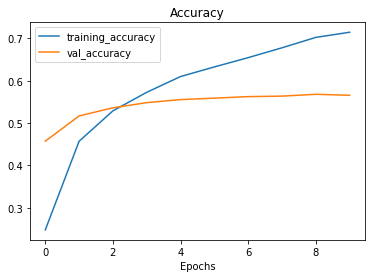

In [18]:
plot_loss_curves(history_0_10_percent)

> The graphs are suggesting that the `model_0` is `overfitting` on the training data. In other words, it is `not generalizing the patterns` it learns from the training data when coming across the `test/validation` data

In [19]:
result_model_0_feature_extraction= model_0.evaluate(test_data)
result_model_0_feature_extraction

790/790 [==============================] - 60s 76ms/step - loss: 1.6350 - accuracy: 0.5655


[1.6349503993988037, 0.5655049681663513]

## Fix overfitting of the model

> We could try `GlobalMaxPooling2D` instead of `GlobalAveragePooling2D` to see if it improves the overfitting issue or not.

**Docs** -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D

> Try `GlobalMaxPooling2D` but the accuracy(46.78%) was much worse compared to `GlobalAveragePooling2D` which was 56.21% and the overfitting issue was still.

> The values from the model trained with `GlobalMaxPooling2D`:

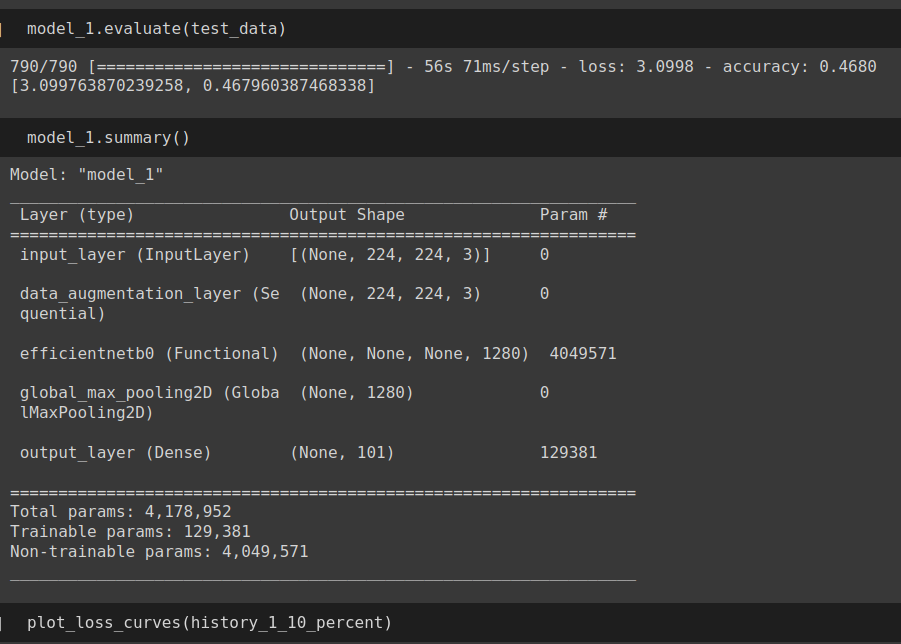


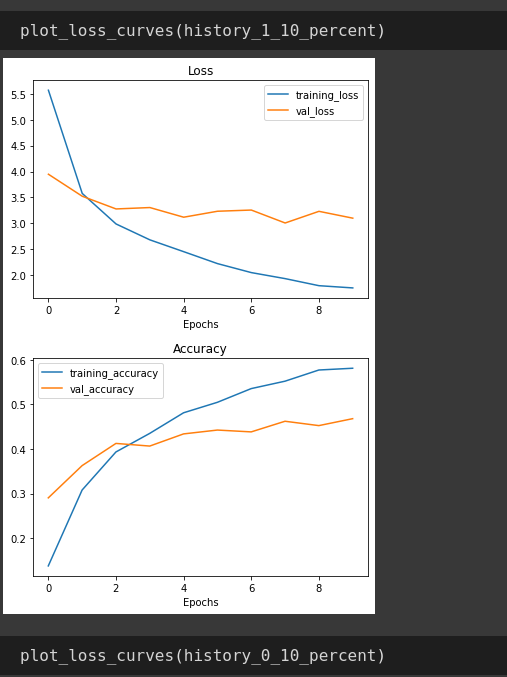

## Trying the Dropout layer to fix overfitting

**Docs** -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout


In [20]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# To minimize Overfitting of the model
x = tf.keras.layers.Dropout(0.5)(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_1= keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

history_1_10_percent= model_1.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=int(0.15 * len(test_data)), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction")])



Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220802-065539
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 3.8028 - accuracy: 0.1665
Epoch 1: val_accuracy did not improve from 0.56784
237/237 [==============================] - 48s 176ms/step - loss: 3.8028 - accuracy: 0.1665 - val_loss: 2.9469 - val_accuracy: 0.3769
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 2.7350 - accuracy: 0.3638
Epoch 2: val_accuracy did not improve from 0.56784
237/237 [==============================] - 40s 169ms/step - loss: 2.7350 - accuracy: 0.3638 - val_loss: 2.4047 - val_accuracy: 0.4590
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 2.3612 - accuracy: 0.4376
Epoch 3: val_accuracy did not improve from 0.56784
237/237 [==============================] - 36s 150ms/step - loss: 2.3612 - accuracy: 0.4376 - val_loss: 2.2187 - val_accuracy: 0.4711
Epoch 4/10
237/237 [=========================

In [21]:
model_1.evaluate(test_data)

790/790 [==============================] - 61s 77ms/step - loss: 1.6759 - accuracy: 0.5583


[1.6759328842163086, 0.5582574009895325]

In [22]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2D (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 output_layer (Dense)        (None, 101)               1293

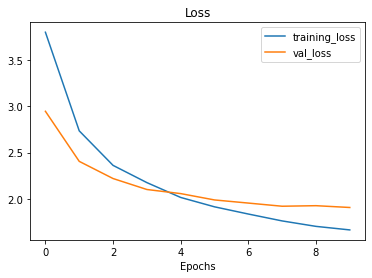

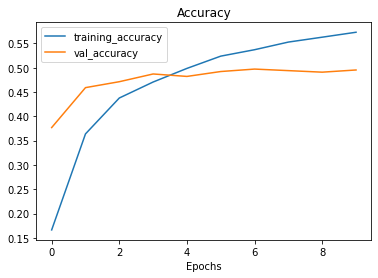

In [23]:
plot_loss_curves(history_1_10_percent)

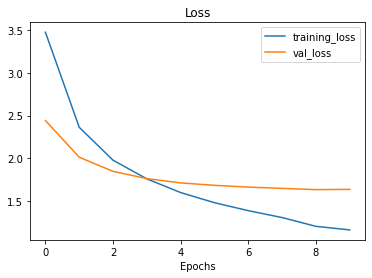

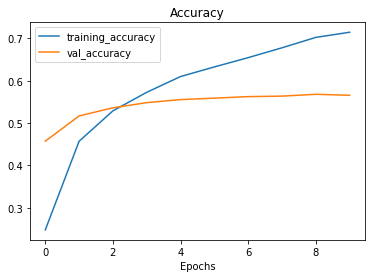

In [24]:
plot_loss_curves(history_0_10_percent)

In [25]:
result_model_1_feature_extraction= model_1.evaluate(test_data)
result_model_1_feature_extraction

790/790 [==============================] - 60s 75ms/step - loss: 1.6759 - accuracy: 0.5583


[1.6759328842163086, 0.5582574009895325]

In [26]:
result_model_0_feature_extraction

[1.6349503993988037, 0.5655049681663513]

## Conclusion

> The `Dropout` layer added to the feature extraction model has helped in reducing `overfitting` of the model. After seeing the graphs of both the models, it is clear `Dropout` layers helps in reducing `overfitting` of the model.

* Model With `Dropout` layer

> **Loss** -> 1.6728649139404297, **Accuracy** -> 0.5590494871139526

* Model without `Dropout` layer
 
> **Loss** -> 1.6465145349502563, **Accuracy** -> 0.5621781945228577

 



## Finding the ideal Learning rate

### Learning Rate Callback

In [27]:
lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/2))

In [28]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# To minimize Overfitting of the model
x = tf.keras.layers.Dropout(0.5)(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_2= keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

history_2_10_percent= model_2.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=int(0.15 * len(test_data)), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction"), lr_callback])



Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220802-071228
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 3.8045 - accuracy: 0.1646
Epoch 1: val_accuracy did not improve from 0.56784
237/237 [==============================] - 40s 142ms/step - loss: 3.8045 - accuracy: 0.1646 - val_loss: 2.9276 - val_accuracy: 0.3853 - lr: 0.0010
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 2.7303 - accuracy: 0.3679
Epoch 2: val_accuracy did not improve from 0.56784
237/237 [==============================] - 34s 143ms/step - loss: 2.7303 - accuracy: 0.3679 - val_loss: 2.3759 - val_accuracy: 0.4574 - lr: 0.0011
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 2.3370 - accuracy: 0.4362
Epoch 3: val_accuracy did not improve from 0.56784
237/237 [==============================] - 35s 145ms/step - loss: 2.3370 - accuracy: 0.4362 - val_loss: 2.1487 - val_accuracy: 0.4844 - lr: 0.0013
Epoch 

Text(0.5, 1.0, 'Finding the ideal learning rate')

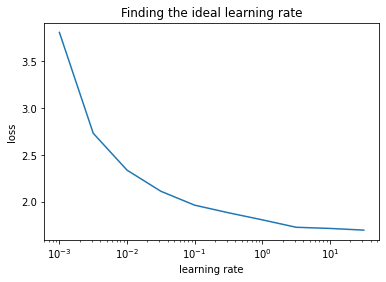

In [31]:
lrs=1e-3 *(10**(tf.range(10)/2))
plt.semilogx(lrs, history_2_10_percent.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

> Let's try a learning_rate of `0.0001`

In [33]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# To minimize Overfitting of the model
x = tf.keras.layers.Dropout(0.5)(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_3= keras.Model(inputs, outputs)

model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

history_3_10_percent= model_3.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=int(0.15 * len(test_data)), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction")])



Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220802-072605
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 4.6707 - accuracy: 0.0181
Epoch 1: val_accuracy did not improve from 0.56784
237/237 [==============================] - 36s 126ms/step - loss: 4.6707 - accuracy: 0.0181 - val_loss: 4.4220 - val_accuracy: 0.0267
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 4.3472 - accuracy: 0.0524
Epoch 2: val_accuracy did not improve from 0.56784
237/237 [==============================] - 32s 134ms/step - loss: 4.3472 - accuracy: 0.0524 - val_loss: 4.1638 - val_accuracy: 0.0861
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 4.0766 - accuracy: 0.1088
Epoch 3: val_accuracy did not improve from 0.56784
237/237 [==============================] - 31s 129ms/step - loss: 4.0766 - accuracy: 0.1088 - val_loss: 3.9419 - val_accuracy: 0.1536
Epoch 4/10
237/237 [=========================

In [34]:
model_3.evaluate(test_data)

790/790 [==============================] - 59s 74ms/step - loss: 2.7477 - accuracy: 0.4366


[2.7477200031280518, 0.43659406900405884]

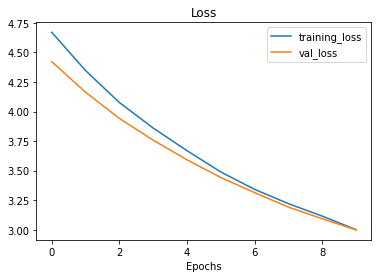

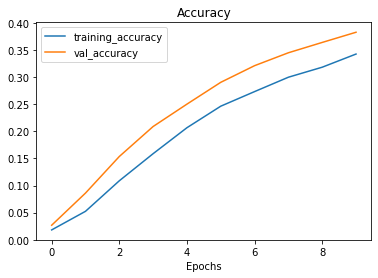

In [35]:
plot_loss_curves(history_3_10_percent)

> Let's try a learning_rate of `0.01`

In [36]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# To minimize Overfitting of the model
x = tf.keras.layers.Dropout(0.5)(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_4= keras.Model(inputs, outputs)

model_4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

history_4_10_percent= model_4.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=int(0.15 * len(test_data)), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction")])



Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220802-074154
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 3.7423 - accuracy: 0.2478
Epoch 1: val_accuracy did not improve from 0.56784
237/237 [==============================] - 37s 130ms/step - loss: 3.7423 - accuracy: 0.2478 - val_loss: 2.3423 - val_accuracy: 0.4367
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 3.1282 - accuracy: 0.3756
Epoch 2: val_accuracy did not improve from 0.56784
237/237 [==============================] - 30s 122ms/step - loss: 3.1282 - accuracy: 0.3756 - val_loss: 2.7185 - val_accuracy: 0.4195
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 3.0153 - accuracy: 0.4124
Epoch 3: val_accuracy did not improve from 0.56784
237/237 [==============================] - 31s 129ms/step - loss: 3.0153 - accuracy: 0.4124 - val_loss: 2.7294 - val_accuracy: 0.4356
Epoch 4/10
237/237 [=========================

In [37]:
model_4.evaluate(test_data)

790/790 [==============================] - 59s 74ms/step - loss: 2.8869 - accuracy: 0.5105


[2.88688325881958, 0.5104950666427612]

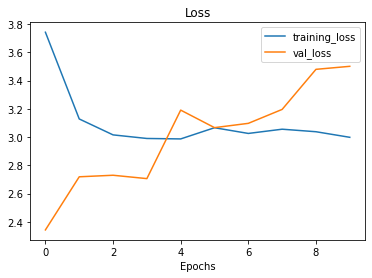

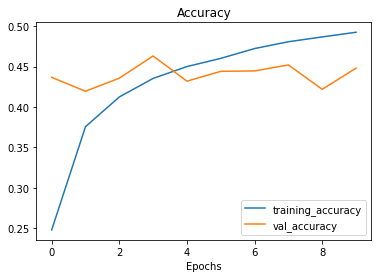

In [38]:
plot_loss_curves(history_4_10_percent)

> `0.01`  learning_rate is not the one, as the `validation_loss` is all over the place and it is increasing at the later epochs

Let's try learning rate of `0.0005` as this falls between `0.0001` and `0.001` learning rates

In [39]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# To minimize Overfitting of the model
x = tf.keras.layers.Dropout(0.5)(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_5= keras.Model(inputs, outputs)

model_5.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))

history_5_10_percent= model_5.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=int(0.15 * len(test_data)), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction")])



Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220802-075756
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 4.1714 - accuracy: 0.1009
Epoch 1: val_accuracy did not improve from 0.56784
237/237 [==============================] - 37s 126ms/step - loss: 4.1714 - accuracy: 0.1009 - val_loss: 3.5183 - val_accuracy: 0.2926
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 3.2505 - accuracy: 0.2824
Epoch 2: val_accuracy did not improve from 0.56784
237/237 [==============================] - 29s 120ms/step - loss: 3.2505 - accuracy: 0.2824 - val_loss: 2.9276 - val_accuracy: 0.3930
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 2.7949 - accuracy: 0.3665
Epoch 3: val_accuracy did not improve from 0.56784
237/237 [==============================] - 31s 130ms/step - loss: 2.7949 - accuracy: 0.3665 - val_loss: 2.6073 - val_accuracy: 0.4486
Epoch 4/10
237/237 [=========================

In [40]:
model_5.evaluate(test_data)

790/790 [==============================] - 58s 74ms/step - loss: 1.7934 - accuracy: 0.5506


[1.7933847904205322, 0.5506138801574707]

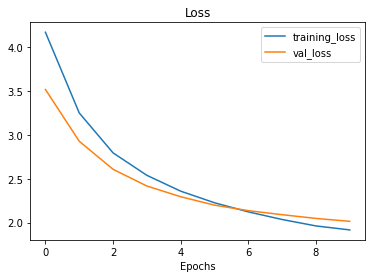

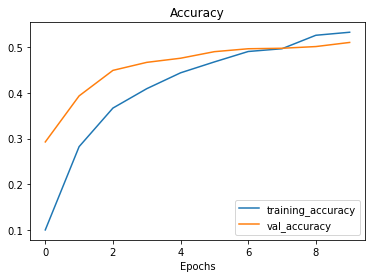

In [41]:
plot_loss_curves(history_5_10_percent)

## Conclusion

> From the above experiments, we can see that with the help of `Dropout` layer and changing/altering the learning rate of the optimizer has helped with lower the `overfitting` problem of the model.

> We can use either `0.0005` or `0.0001` as the learning rate value.


> `model_5` is the final feature_extraction model, we will `train it again` to `save the weights` of the model. This model will be used for `fine-tuning` later on

## Training `model_5` again to save the weights of the model

In [42]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= augmented_layer(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# To minimize Overfitting of the model
x = tf.keras.layers.Dropout(0.5)(x)

outputs= layers.Dense(CLASS_COUNT, activation="softmax", name="output_layer")(x)

model_final= keras.Model(inputs, outputs)

model_final.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))

history_final_10_percent= model_final.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=int(0.15 * len(test_data)), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction_final"), model_check_point_callback])



Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction_final/20220802-084747
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 4.1663 - accuracy: 0.0974
Epoch 1: val_accuracy did not improve from 0.56784
237/237 [==============================] - 35s 121ms/step - loss: 4.1663 - accuracy: 0.0974 - val_loss: 3.5370 - val_accuracy: 0.2677
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 3.2514 - accuracy: 0.2768
Epoch 2: val_accuracy did not improve from 0.56784
237/237 [==============================] - 28s 116ms/step - loss: 3.2514 - accuracy: 0.2768 - val_loss: 2.9691 - val_accuracy: 0.3700
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 2.8014 - accuracy: 0.3617
Epoch 3: val_accuracy did not improve from 0.56784
237/237 [==============================] - 31s 130ms/step - loss: 2.8014 - accuracy: 0.3617 - val_loss: 2.6234 - val_accuracy: 0.4303
Epoch 4/10
237/237 [===================

In [43]:
model_final.evaluate(test_data)

790/790 [==============================] - 58s 73ms/step - loss: 1.7924 - accuracy: 0.5472


[1.792427897453308, 0.5471683144569397]

In [ ]:
result_final_feature_exctration= model_final.evaluate(test_data)
result_final_feature_exctration

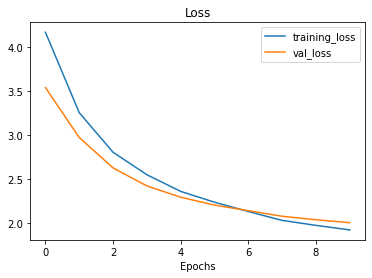

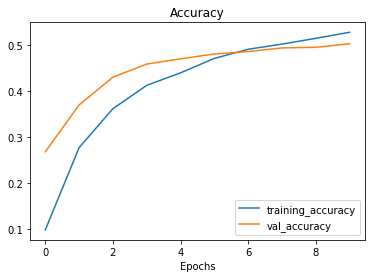

In [44]:
plot_loss_curves(history_final_10_percent)

## Unfreezing the last `20` layers for Fine-tuning `model_final`

* Learning Rate is `0.0005`

In [45]:
base_model.trainable= True

for layer in base_model.layers[:-20]:
  layer.trainable= False


model_final.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005))

In [47]:
for layer in model_final.layers[2].layers:
  if layer.trainable == True:
    print(layer, layer.name, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7efe13312150> block6d_project_conv True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efe13319050> block6d_project_bn True
<keras.layers.core.dropout.Dropout object at 0x7efe13324f50> block6d_drop True
<keras.layers.merge.Add object at 0x7efe1331e910> block6d_add True
<keras.layers.convolutional.Conv2D object at 0x7efe132a9590> block7a_expand_conv True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efe132b30d0> block7a_expand_bn True
<keras.layers.core.activation.Activation object at 0x7efe132b92d0> block7a_expand_activation True
<keras.layers.convolutional.DepthwiseConv2D object at 0x7efe132b3490> block7a_dwconv True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7efe132ca910> block7a_bn True
<keras.layers.core.activation.Activation object at 0x7efe132cfb10> block7a_activation True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7ef

In [48]:
len(model_final.trainable_variables)

21

## Fine-Tuning `model_final` with `20` unfrozen layers

In [49]:
inital_epochs=10
fine_tune_epochs= inital_epochs + 10

history_10_percent_20_unfrozen=model_final.fit(train_data_10_percent, epochs=fine_tune_epochs, initial_epoch= history_final_10_percent.epoch[-1], steps_per_epoch=len(train_data_10_percent), validation_data=test_data, validation_steps=int(0.15 * len(test_data)), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_fine_tune_last_20_layers")] )

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_20_layers/20220802-090242
Epoch 10/20
237/237 [==============================] - 41s 139ms/step - loss: 1.7360 - accuracy: 0.5484 - val_loss: 1.9411 - val_accuracy: 0.4939
Epoch 11/20
237/237 [==============================] - 30s 125ms/step - loss: 1.6438 - accuracy: 0.5729 - val_loss: 1.8786 - val_accuracy: 0.5066
Epoch 12/20
237/237 [==============================] - 31s 129ms/step - loss: 1.5775 - accuracy: 0.5850 - val_loss: 1.8220 - val_accuracy: 0.5228
Epoch 13/20
237/237 [==============================] - 30s 125ms/step - loss: 1.5136 - accuracy: 0.6003 - val_loss: 1.8270 - val_accuracy: 0.5267
Epoch 14/20
237/237 [==============================] - 29s 122ms/step - loss: 1.4548 - accuracy: 0.6187 - val_loss: 1.7996 - val_accuracy: 0.5286
Epoch 15/20
237/237 [==============================] - 31s 129ms/step - loss: 1.4217 - accuracy: 0.6189 - val_loss: 1.7958 - val_accuracy: 0.5373
Epoch 16/20
237/237 [

In [50]:
model_final.evaluate(test_data)

790/790 [==============================] - 58s 73ms/step - loss: 1.5089 - accuracy: 0.5976


[1.5089058876037598, 0.5976237654685974]

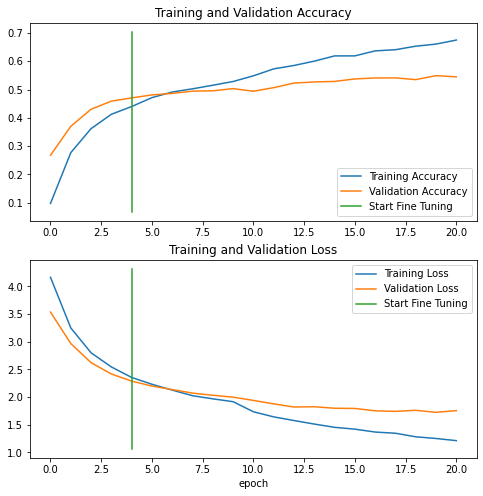

In [53]:
compare_historys(history_final_10_percent, history_10_percent_20_unfrozen)

> Model is `overfitting`, need to fit it.

In [51]:
model_final.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2D (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 output_layer (Dense)        (None, 101)               1293

In [52]:
result_1_fine_tuning=model_final.evaluate(test_data)
result_1_fine_tuning

790/790 [==============================] - 58s 73ms/step - loss: 1.5089 - accuracy: 0.5976


[1.5089058876037598, 0.5976237654685974]

In [ ]:
result_final_feature_exctration

[1.6306202411651611, 0.566891074180603]

## Saving and Loading Model

In [55]:
model_final.save('/content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_final_saved_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_final_saved_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_final_saved_model/assets


In [56]:
loaded_model= tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_final_saved_model')

## Evaluate Loaded model

In [ ]:
loaded_model.evaluate(test_data)

790/790 [==============================] - 60s 74ms/step - loss: 1.9961 - accuracy: 0.5733


[1.9961079359054565, 0.5733069181442261]

In [ ]:
result_1_fine_tuning

[1.9961079359054565, 0.5733069181442261]

## Evaluating the performance of the `model_0` across different classes

> Making some predictions, vizualizing the predictions

> In other words, every time the trained model see's an image it will compare it to all of the patterns it learned during training and return an output for every class (all 101 of them) of how likely the image is to be that class

## Downloading a pre-trained model

Link -> https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2022-08-01 14:39:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  42.3MB/s    in 1.1s    

2022-08-01 14:39:20 (42.3 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
unzip_data('06_101_food_class_10_percent_saved_big_dog_model.zip')

In [ ]:
model_1 = tf.keras.models.load_model('06_101_food_class_10_percent_saved_big_dog_model')

In [ ]:
result_loaded_model_1= model_1.evaluate(test_data)
result_loaded_model_1

790/790 [==============================] - 59s 73ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027206659317017, 0.6077623963356018]

In [ ]:
result_1_fine_tuning

[1.9961079359054565, 0.5733069181442261]

## Making predictions with the trained model

In [ ]:
preds_probs= model_0.predict(test_data, verbose=1)

790/790 [==============================] - 59s 74ms/step


In [ ]:
preds_probs_1= model_1.predict(test_data, verbose=1)

790/790 [==============================] - 60s 76ms/step


In [ ]:
len(preds_probs)

25250

In [ ]:
preds_probs.shape

(25250, 101)

In [ ]:
preds_probs[1]

array([9.8935390e-01, 5.8344808e-11, 1.3320721e-05, 8.1959231e-11,
       2.4935568e-12, 3.4711645e-12, 3.4073470e-11, 3.0959776e-10,
       7.6818208e-07, 3.6786233e-08, 2.2281867e-08, 4.3025326e-09,
       7.3555765e-07, 8.2188649e-07, 7.1961568e-07, 1.3769219e-10,
       2.1370874e-06, 2.7933640e-07, 2.9679523e-08, 1.7635555e-06,
       1.9957894e-10, 8.8594434e-06, 3.3291312e-07, 1.0181957e-09,
       6.3367597e-06, 1.4661339e-10, 1.6826255e-07, 1.1839713e-10,
       2.9521913e-10, 2.0132936e-07, 1.2192403e-11, 5.9258189e-11,
       4.8115758e-06, 1.1961473e-13, 4.8551749e-14, 4.6004192e-10,
       1.2227331e-04, 6.2042673e-09, 4.8845386e-09, 2.7793230e-09,
       4.6690278e-09, 3.7581725e-07, 6.4953910e-11, 2.8579867e-13,
       4.4924255e-11, 9.4641033e-15, 1.5071470e-05, 4.1881046e-07,
       2.1025556e-11, 2.4423347e-08, 6.2640959e-07, 2.4463731e-11,
       3.1633965e-06, 4.2984946e-10, 1.2999530e-11, 4.0823275e-10,
       4.0694522e-07, 9.8901894e-03, 5.4298852e-08, 1.3964058e

> The model ouputs a `prediction probability` array(with `N` number of variables, where `N` is the number of classes) for each sample passed on the predict method.

In [ ]:
preds_probs[1].shape

(101,)

In [ ]:
len(preds_probs[1])

101

In [ ]:
sum(preds_probs[1])

0.9999999970913811

In [ ]:
np.argmin(preds_probs[1])

88

In [ ]:
preds_probs[1].min()

4.617805e-15

In [ ]:
np.argmax(preds_probs[1])

0

In [ ]:
preds_probs[1].max()

0.9893539

In [ ]:
test_data.class_names[np.argmax(preds_probs[1])]

'apple_pie'

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 1: {len(preds_probs[1])}")
print(f"What prediction probability sample 1 looks like:\n {preds_probs[1]}")
print(f"The class with the highest predicted probability by the model for sample 1: {preds_probs[1].argmax()}")

Number of prediction probabilities for sample 1: 101
What prediction probability sample 1 looks like:
 [9.8935390e-01 5.8344808e-11 1.3320721e-05 8.1959231e-11 2.4935568e-12
 3.4711645e-12 3.4073470e-11 3.0959776e-10 7.6818208e-07 3.6786233e-08
 2.2281867e-08 4.3025326e-09 7.3555765e-07 8.2188649e-07 7.1961568e-07
 1.3769219e-10 2.1370874e-06 2.7933640e-07 2.9679523e-08 1.7635555e-06
 1.9957894e-10 8.8594434e-06 3.3291312e-07 1.0181957e-09 6.3367597e-06
 1.4661339e-10 1.6826255e-07 1.1839713e-10 2.9521913e-10 2.0132936e-07
 1.2192403e-11 5.9258189e-11 4.8115758e-06 1.1961473e-13 4.8551749e-14
 4.6004192e-10 1.2227331e-04 6.2042673e-09 4.8845386e-09 2.7793230e-09
 4.6690278e-09 3.7581725e-07 6.4953910e-11 2.8579867e-13 4.4924255e-11
 9.4641033e-15 1.5071470e-05 4.1881046e-07 2.1025556e-11 2.4423347e-08
 6.2640959e-07 2.4463731e-11 3.1633965e-06 4.2984946e-10 1.2999530e-11
 4.0823275e-10 4.0694522e-07 9.8901894e-03 5.4298852e-08 1.3964058e-05
 8.5853795e-09 2.3125343e-14 3.9967767e-06 1.

In [ ]:
test_data.class_names[0]

'apple_pie'